In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()

In [3]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
   
    plt.plot(percentages,mean, label=label, color=color)
    plt.fill_between(percentages, mean + std, mean - std, facecolor=color, alpha=0.5)
    if log: plt.xscale('log')
    plt.legend()

In [4]:
def treat(arr):
    l = []
    k = []
    for i in range(arr.shape[0]):
        if arr[i]!=0:
            l.append(i)
    return l

In [5]:
random = np.load('new_random.npy')
random.shape
l = treat(random[0])
random = random [:,l]

In [6]:
vogn_bald= np.load('vogn_results/vogn_bald.npy')[:,l]
vogn_ent= np.load('vogn_results/vogn_ent.npy')[:,l]
vogn_f= np.load('vogn_results/vogn_f.npy')[:,l]
vogn_std= np.load('vogn_results/vogn_std.npy')[:,l]
vogn_var= np.load('vogn_results/vogn_var.npy')[:,l]

In [7]:
mc_bald= np.load('mc_results/mc_bald.npy')[:,l]
mc_ent= np.load('mc_results/mc_ent.npy')[:,l]
mc_f= np.load('mc_results/mc_f.npy')[:,l]
mc_std= np.load('mc_results/mc_std.npy')[:,l]
mc_var= np.load('mc_results/mc_var.npy')[:,l]

In [8]:
batch_size_sample = np.ones(261).astype(int)
for i in range(100):
    batch_size_sample[i+110]=3
for i in range(60):
    batch_size_sample[i+200]=5

In [9]:
nnn = np.ones(262)
for i in range(261):
    nnn[i+1] = nnn[i] + batch_size_sample[i]

<Figure size 432x288 with 0 Axes>

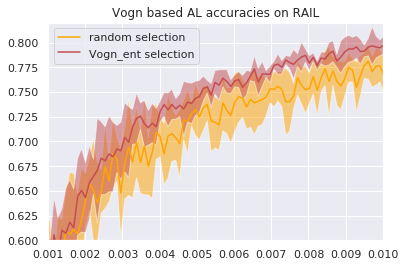

In [10]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.001, 0.01), ylim=(0.6, 0.82), autoscale_on=False,title='Vogn based AL accuracies on RAIL')
plot_mean_std(np.arange(684)[1:102]/9472,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn[:101]/9472,vogn_bald[:,:101],'Vogn_bald selection',color='blue')
plot_mean_std(nnn[:101]/9472,vogn_ent[:,:101],'Vogn_ent selection',color='r')
#plot_mean_std(nnn[:101]/9472,vogn_f[:,:101],'Vogn_f selection',color='m')
#plot_mean_std(nnn[:101]/9472,vogn_std[:,:101],'Vogn_std selection',color='y')
#plot_mean_std(nnn[:101]/9472,vogn_var[:,:101],'Vogn_var selection',color='k')
plt.savefig('graph_vogn_02.png')

<Figure size 432x288 with 0 Axes>

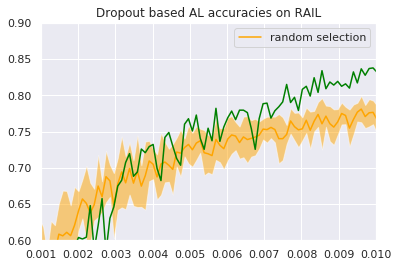

In [17]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.001, 0.01), ylim=(0.6, 0.9), autoscale_on=False,title='Dropout based AL accuracies on RAIL')
plot_mean_std(np.arange(684)[1:102]/9472,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn[:101]/9472,mc_bald[:,:101],'mc_bald selection',color='blue')
#plot_mean_std(nnn[:101]/9472,mc_ent[:,:101],'mc_ent selection',color='r')
plt.plot(nnn[:101]/9472,mc_f[0,:101],color='green')
#plot_mean_std(nnn[:101]/9472,mc_std[:,:101],'mc_std selection',color='y')
#plot_mean_std(nnn[:101]/9472,mc_var[:,:101],'mc_var selection',color='k')
plt.savefig('graph_mc_02.png')

<Figure size 432x288 with 0 Axes>

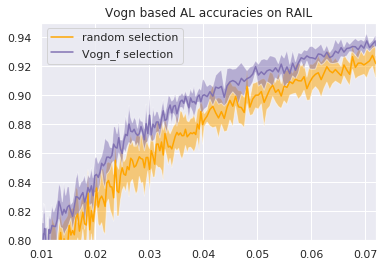

In [24]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.01, 0.072), ylim=(0.8, 0.95), autoscale_on=False,title='Vogn based AL accuracies on RAIL')
plot_mean_std(nnn/9472,random,'random selection',color='orange')
#plot_mean_std(nnn/9472,vogn_bald,'Vogn_bald selection',color='blue')
#plot_mean_std(nnn/9472,vogn_ent,'Vogn_ent selection',color='r')
plot_mean_std(nnn/9472,vogn_f,'Vogn_f selection',color='m')
#plot_mean_std(nnn/9472,vogn_std,'Vogn_std selection',color='y')
#plot_mean_std(nnn/9472,vogn_var,'Vogn_var selection',color='k')
#plt.savefig('graph_vogn.png')

<Figure size 432x288 with 0 Axes>

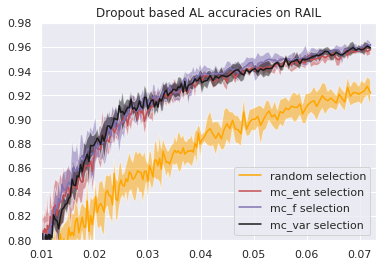

In [43]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.01, 0.073), ylim=(0.8, 0.98), autoscale_on=False,title='Dropout based AL accuracies on RAIL')
plot_mean_std(nnn/9472,random,'random selection',color='orange')
#plot_mean_std(nnn/9472,mc_bald,'mc_bald selection',color='blue')
plot_mean_std(nnn/9472,mc_ent,'mc_ent selection',color='r')
plot_mean_std(nnn/9472,mc_f,'mc_f selection',color='m')
#plot_mean_std(nnn/9472,mc_std,'mc_std selection',color='y')
plot_mean_std(nnn/9472,mc_var,'mc_var selection',color='k')
plt.savefig('graph_mc.png')

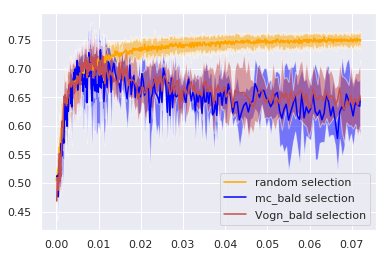

In [20]:
plt.clf()
plot_mean_std(np.arange(684)/9472,random,'random selection',color='orange')
plot_mean_std(nnn/9472,mc_bald,'mc_bald selection',color='blue')
plot_mean_std(nnn/9472,vogn_bald,'Vogn_bald selection',color='r')

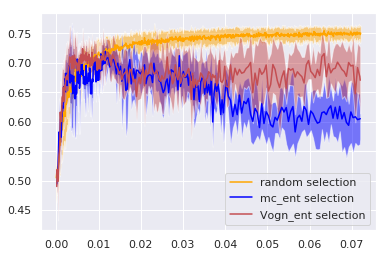

In [21]:
plt.clf()
plot_mean_std(np.arange(684)/9472,random,'random selection',color='orange')
plot_mean_std(nnn/9472,mc_ent,'mc_ent selection',color='blue')
plot_mean_std(nnn/9472,vogn_ent,'Vogn_ent selection',color='r')

<Figure size 432x288 with 0 Axes>

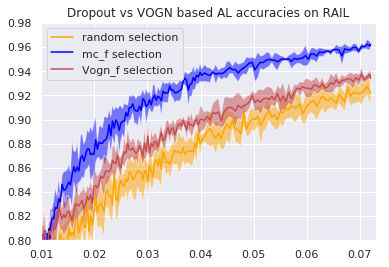

In [47]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.01, 0.073), ylim=(0.8, 0.98), autoscale_on=False,title='Dropout vs VOGN based AL accuracies on RAIL')
plot_mean_std(nnn/9472,random,'random selection',color='orange')
plot_mean_std(nnn/9472,mc_f,'mc_f selection',color='blue')
plot_mean_std(nnn/9472,vogn_f,'Vogn_f selection',color='r')

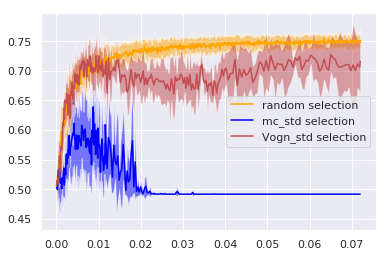

In [23]:
plt.clf()
plot_mean_std(np.arange(684)/9472,random,'random selection',color='orange')
plot_mean_std(nnn/9472,mc_std,'mc_std selection',color='blue')
plot_mean_std(nnn/9472,vogn_std,'Vogn_std selection',color='r')

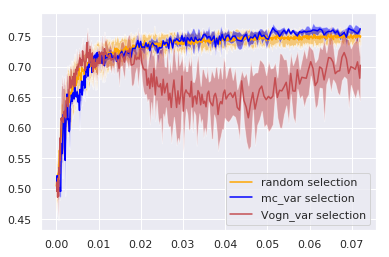

In [24]:
plt.clf()
plot_mean_std(np.arange(684)/9472,random,'random selection',color='orange')
plot_mean_std(nnn/9472,mc_var,'mc_var selection',color='blue')
plot_mean_std(nnn/9472,vogn_var,'Vogn_var selection',color='r')